# COSC 74 - Homework 4
## Nikhil Pande

In [268]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import random
import math
import statistics
%matplotlib inline

### Part I: Naive Bayes Classification

You are given a training dataset in CSV format (hw4_naive.csv). The training data has
5,600 rows:
- Columns 1 through 6 of the given CSV file represent the features (X)
- The last column (“Label”) represents the class label (Y) (0 or 1)

1) Divide the data into test / train sets (80% and 20% respectively)

In [269]:
from sklearn.model_selection import train_test_split 

naive = np.loadtxt("hw4_naive.csv", skiprows = 1, delimiter = ",")
train, test = train_test_split(naive, test_size = 0.2, random_state = 0)


2) Implement a Multinomial Naïve Bayes classifier from scratch, with
smoothing. You can set the default smoothing value to 1. You are free to code
this up however you like, however, make sure that there is a function that can be
called with a test X vector and returns the predicted Y.

In [270]:
def MultiBayes(train, x):
    likelihood = 0
    prior = 0
    numrows = len(train)
    m = []
    n = []
    
    # counts start at one because of smoothing
    m_count=[1,1,1,1,1,1]
    n_count=[1,1,1,1,1,1]
    
    for row in train:
        # Calculate prior
        prior += row[6]
        
        if (row[6] == 1):
            m.append(row)
            for i in range(len(row)-1):
                if row[i]==x[i]:
                    m_count[i]+=1
            
        else:
            n.append(row)
            for i in range(len(row)-1):
                if row[i]==x[i]:
                    n_count[i]+=1
        
    prior = prior / numrows
    
    # likelihood for m (1)
    likelihood_m = prior
    for count in m_count:
        likelihood_m += np.log(count / (len(m) + 6))  # Laplace smoothing with a count of 1
        
    # likelihood for n (0)
    likelihood_n = 1 - prior
    for count in n_count:
        likelihood_n += np.log(count / (len(n) + 6))  # Laplace smoothing with a count of 1

    
    # compare
    if likelihood_n > likelihood_m:
        return 0
    return 1


3) Implement a Gaussian Naïve Bayes classifier from scratch (no need for smoothing here).

In [271]:
def GaussBayes(train, x):
    likelihood = 0
    prior = 0
    numrows = len(train)
    m = []
    n = []
    
    # initialize array of arrays, where the inner array tracks
    # the observations for each feature where label = 1 (m) or
    # label = 0 (n)
    m_count = [[], [], [], [], [], []]
    n_count= [[], [], [], [], [], []]
    
    
    for row in train:
        # Calculate prior
        prior += row[6]
        
        if (row[6] == 1):
            m.append(row)
            for i in range(len(row)-1):
                m_count[i].append(row[i])
            
        else:
            n.append(row)
            for i in range(len(row)-1):
                n_count[i].append(row[i])

                
    # calculate prior
    prior = prior / numrows
                
    # calculate mean and stddev for ultimate formula
    means_m = []
    means_n = []
    var_m = []
    var_n = []
    
    for i in range(len(m_count)):
        means_m.append(np.mean(np.array(m_count[i])))
        means_n.append(np.mean(np.array(n_count[i])))
        var_m.append(np.std(n_count[i])**2)
        var_n.append(np.std(m_count[i])**2)
            
    # l_m = likelihood of m (1)
    l_m = prior
    l_n = 1-prior
    
    for i in range(len(m_count)):
        l_m = l_m*(1/np.sqrt(2*np.pi*var_m[i])) * np.exp(-1 * (x[i] - means_m[i])**2 / (2*var_m[i]))
        l_n = l_n*(1/np.sqrt(2*np.pi*var_n[i])) * np.exp(-1 * (x[i] - means_n[i])**2 / (2*var_n[i]))
            
    if l_m >= l_n:
        return 1
    return 0
    

In [272]:
# Multinomial NB variables
TPm = 0
FPm = 0
FNm = 0
TNm = 0

# Gaussian NB Variables
TPg = 0
FPg = 0
FNg = 0
TNg = 0


for x in test:
    pred_m = MultiBayes(train, x)
    pred_g = GaussBayes(train, x)
    
    # calculate multinomial scores
    if pred_m == 1 and x[6] == 1:
        TPm += 1
    elif pred_m == 1:
        FPm += 1
    elif x[6] == 1:
        FNm += 1
    else:
        TNm += 1 
        
    # calculate gaussian scores
    if pred_g == 1 and x[6] == 1:
        TPg += 1
    elif pred_g == 1:
        FPg += 1
    elif x[6] == 1:
        FNg += 1
    else:
        TNg += 1
        
print("Finished")


Finished


In [273]:
precisionm = TPm / (TPm+FPm)
recallm = TPm / (TPm+FNm)
accuracym = (TPm+TNm) / (TPm+TNm+FPm+FNm)
F1m=2*precisionm*recallm / (precisionm + recallm)


print("Multinomial NB Accuracy: ", accuracym)
print("Multinomial NB F1: ", F1m)

Multinomial NB Accuracy:  0.8723214285714286
Multinomial NB F1:  0.8511966701352758


In [274]:
precisiong = TPg / (TPg + FPg)
recallg = TPg / (TPg + FNg)
accuracyg = (TPg+TNg) / (TPg+TNg+FPg+FNg)
F1g=2*precisiong*recallg / (precisiong + recallg)


print("Gaussian NB Accuracy: ", accuracyg)
print("Multinomial NB F1: ", F1g)

Gaussian NB Accuracy:  0.4375
Multinomial NB F1:  0.5007923930269415


### Part II: Clustering

You are given a training dataset in CSV format (hw4_cluster.csv). The files each contain
40 rows with 2 columns. Column 1 & 2 are the features. There are no labels for this
dataset. Your goal for this assignment is to implement a clustering algorithm and run it
on this dataset. For this assignment you can the Euclidean distance as the distance
function.

1) Implement a generalized K-means algorithm from scratch. You should have a single function that takes in as input the data points, K, and some other hyperparameters, specified below. The function should return K sets of data points. Each set corresponding to one cluster.

The hyperparameters your functions should support and the values they can take are:
- The method for calculating the centroid (i.e. the mean)
- The initialization method: Random Split Initialization or Random Seed Selection Method
- Max_iter: max number of iterations to run the algorithm.
- K: number of clusters

Note that your stopping condition should have two parts:
1. Stop if you reach the max iterations
2. Stop if no change is made to the clusters in the last step.

You will be running this code as part of the next question. For this part you just need to
implement the function.

In [275]:
cluster = np.loadtxt("hw4_cluster.csv", delimiter = ",", skiprows = 1)

In [276]:
# HELPER METHODS
# two methods to initialize the centroids
def random_split(data, K, centroid_method):
    clusters = np.array_split(data, K)
    centroids = update_centroids(clusters, centroid_method)
    return centroids
    
def random_seed(data, K, centroid_method):
    seeds = np.random.choice(len(data), K, replace = False)
    centroids = data[seeds]
    return centroids
    

# method to calculate distance between points and centroid, depending on method
def distance(point, centroid, centroid_method):
    if centroid_method == 'mean':
        return np.linalg.norm(point - centroid, ord = 2)

    elif centroid_method == 'median':
        return np.linalg.norm(point - centroid, ord = 1)

    else:
        raise ValueError('distance method must be mean or median.')

# method to update centroids based on clusters and method
def update_centroids(clusters, centroid_method):
    centroids = []

    for cluster in clusters:
        if centroid_method == 'mean':
          centroid = np.mean(cluster, axis = 0)

        elif centroid_method == 'median':
          centroid = np.median(cluster, axis = 0)

        else:
          raise ValueError('centroid method must be mean or median.')

        centroids.append(centroid)

    return centroids

# overall k_means implementation, using the above methods
def k_means(data, K, initialization_method = random_split, centroid_method = 'mean', max_iter = 100):
    centroids = initialization_method(data, K, centroid_method)

    # loop until max iters has been reached
    for _ in range(max_iter):
        
        clusters = [[] for _ in range(len(centroids))]

        for point in data:
            closest = min(range(len(centroids)), key = lambda i: distance(point, centroids[i], centroid_method))
            clusters[closest].append(point)
            
        previous_centroids = centroids
        centroids = update_centroids(clusters, centroid_method) # update the centroids

        # or stop when no change has been made
        if np.array_equal(previous_centroids, centroids):
            break

    return clusters

2) Silhouette score. In this part of the assignment, you are implementing a function from scratch that calculates the Silhouette score for a list of clusters. The function should take in a list of clusters (such as the output of the last function you implemented) and return a single Silhouette score. Report the Silhouette score for {k=5, Initialization method = Random Seed Selection, Max_iter = 50, method for calculating centroid = mean} using your K-Means code from the previous question.

In [277]:
# Function to calculate the avg distance between two clusters
def average_distance(cluster, other_cluster):
  distance = 0

  for i in range(len(cluster)):
    for j in range(len(other_cluster)):
      distance += np.linalg.norm(cluster[i] - other_cluster[j], ord = 2)
  
  return distance / len(other_cluster)


def sil(clusters):
    cluster_count = 0
    for cluster in clusters:
        if not np.array_equal(cluster, np.array([])):
            cluster_count += 1
            
    if cluster_count <= 1:
        return -1  # Silhouette score is -1

    silhouette_scores = []
    
    for i, cluster in enumerate(clusters): 
        # Calculate a(i) - average distance from data point to other points in same cluster
        a_i = average_distance(cluster, cluster)
        
        # Calculate b(i) - average distance from data point to points in other cluster
        b_values = []
        for j, other in enumerate(clusters):
            if i != j:
                b_values.append(average_distance(cluster, other))

        b_i = min(b_values)
        
        
        # Calculate Silhouette score for this cluster
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
            
    # Overall Silhouette score is the mean of the Silhouette scores for all clusters
    return np.mean(silhouette_scores)


# test silhouette function
c1 = k_means(cluster, 5, random_seed, 'mean', 50)

sil(c1)


0.6210914928018528

### Bonus Section

Finding best K. Run the code you implemented in question 1 for
k=2,3,4,5. Set the other hyperparameters to the following:
- The method for calculating the centroid: Mean
- The initialization method: Random Split Initialization
- Max_iterations: 100

Calculate the Silhouette score for each K using the function in question 2 and use these
scores to pick the best K. What is the best value of K?


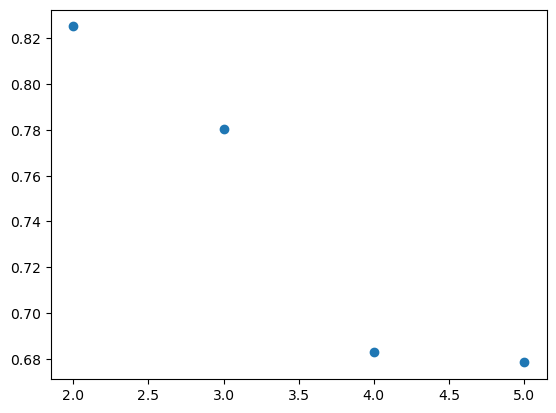

In [278]:
# BONUS POINTS
c2 = k_means(cluster, 2, random_split, 'mean', 100)
c3 = k_means(cluster, 3, random_split, 'mean',  100)
c4 = k_means(cluster, 4, random_split, 'mean', 100)
c5 = k_means(cluster, 5, random_split, 'mean',  100)

s2 = sil(c2)
s3 = sil(c3)
s4 = sil(c4)
s5 = sil(c5)

plt.scatter(range(2,6),[s2,s3,s4,s5])

**Answer:** It's clear from the scatter plot that 2 clusters is the optimal number of clusters. With this number of clusters, we have the highest silhouette score, which implies that the distance within clusters is small for two clusters, and the distance between these two clusters is large.